['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py


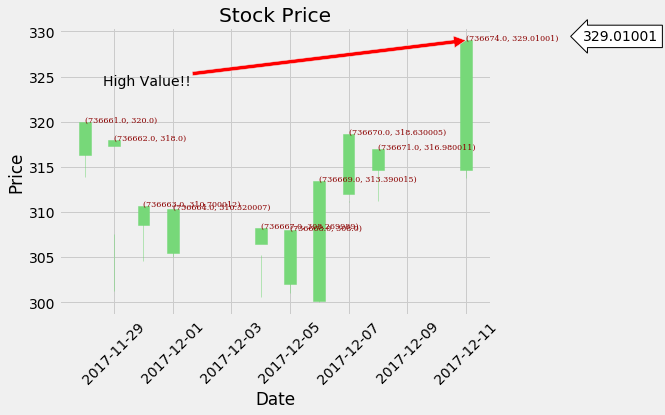

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.ticker as mticker
from matplotlib import style as mstyle

# As matplotlib.finance is deprecated so install mpl-finance => pip install mpl-finance
# from matplotlib.finance import candlestick_ohlc - is deprecated so use the below import statement
from mpl_finance import candlestick_ohlc

import numpy as np
import csv

dates = []
open_vals = []
close_vals = []
high_vals = []
low_vals = []
adj_vals = []
volumes = []

# Show all the styles available like - 'bmh', 'classic', 'dark_background', 
    # 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 
    # 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 
    # 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 
    # 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 
    # 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test'
print(plt.style.available)
print(plt.__file__) # Print the directory where styles are available

#mstyle.use('bmh')
#mstyle.use('classic')
#mstyle.use('dark_background')
#mstyle.use('fast')
mstyle.use('fivethirtyeight')
#mstyle.use('ggplot')
#mstyle.use('grayscale')
#mstyle.use('seaborn-bright')
#mstyle.use('seaborn-deep')
#mstyle.use('seaborn-muted')
#mstyle.use('seaborn-notebook')
#mstyle.use('seaborn-paper')
#mstyle.use('seaborn-pastel')
#mstyle.use('seaborn-poster')
#mstyle.use('seaborn-talk')
#mstyle.use('seaborn-ticks')
#mstyle.use('seaborn-white')
#mstyle.use('seaborn-whitegrid')
#mstyle.use('seaborn')
#mstyle.use('Solarize_Light2')
#mstyle.use('tableau-colorblind10')
#mstyle.use('_classic_test')

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    
# Method - II to read the csv file into lists
dates, open_vals, close_vals, high_vals, low_vals, adj_vals, volumes = np.loadtxt('c:\\users\\anand\\Exercises\\Ex_MatplotLib\\TSLA.csv',
                                                                                 delimiter=',',
                                                                                 unpack=True,
                                                                                 converters={0: bytespdate2num('%d-%m-%y')})

# Capture the figure
fig = plt.figure()

# Refer to subplot in the figure
ax1 = plt.subplot2grid((1,1), (0,0))

x = 0
y = len(dates)
ohlc = []

while x < y:
    append_me = dates[x], open_vals[x], high_vals[x], low_vals[x], close_vals[x], volumes[x]
    ohlc.append(append_me)
    x+=1

candlestick_ohlc(ax1, ohlc, width=0.4, colorup = '#77d879', colordown = '#db3f3f')

# To tilt x axis labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# To set date format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

font_dict = {'family':'serif', 'color':'darkred', 'size':'8'}

# To show the (x,y) points
for i in range(len(dates)):
    str_pair = "({0}, {1})".format(dates[i], close_vals[i])
    ax1.text(dates[i], close_vals[i], str_pair, fontdict=font_dict)

# To show annotation pointing at some coords, with arrow starting at some coords, etc.
ax1.annotate('High Value!!', 
             (dates[len(dates)-1], close_vals[len(close_vals)-1]), 
xytext=(0.1, 0.8), 
textcoords = 'axes fraction', 
arrowprops = dict(facecolor='red'))

# To show annotation arrow
bbox_props = dict(boxstyle='larrow', fc='w', ec='k', lw=1)
ax1.annotate(str(close_vals[len(close_vals)-1]), (dates[-1], close_vals[len(close_vals)-1]),
            xytext = (dates[-1]+4, close_vals[len(close_vals)-1]), bbox = bbox_props)

    
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
#plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=.2, hspace=.2)

plt.show()
